In [1]:
import sys 
sys.path.append('..')
from projet_etu import *
import numpy as np 
import matplotlib as plt 
from mltools import *
from utils import *
import pickle as pkl
from loss import *
from activation import *
from sklearn.datasets import load_digits
import pandas as pd
from sklearn.datasets import fetch_olivetti_faces

In [2]:
data = fetch_olivetti_faces()
data, label = data["data"], data["target"]
data.shape

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /users/Etu3/28600693/scikit_learn_data


(400, 4096)

In [5]:
Encodage = [Linear(4096, 2048), TanH(), Linear(2048, 1024), TanH()]
Decodage = [Linear(1024, 2048), TanH(), Linear(2048, 4096), Sigmoid()]

bce_loss = BCELoss()
net = Sequential(Encodage + Decodage)

Lerror, Lscore = SGD(net, bce_loss, data, data, eps=1e-3, max_iter= 100, batch_size= 10)

Iteration: 0 / 100
cost  0.667
Iteration: 1 / 100
cost  0.665
Iteration: 2 / 100
cost  0.665
Iteration: 3 / 100
cost  0.659
Iteration: 4 / 100
cost  0.658
Iteration: 5 / 100
cost  0.662
Iteration: 6 / 100
cost  0.655
Iteration: 7 / 100
cost  0.652
Iteration: 8 / 100
cost  0.651
Iteration: 9 / 100
cost  0.651
Iteration: 10 / 100
cost  0.65
Iteration: 11 / 100
cost  0.649
Iteration: 12 / 100
cost  0.647
Iteration: 13 / 100
cost  0.652
Iteration: 14 / 100
cost  0.647
Iteration: 15 / 100
cost  0.65
Iteration: 16 / 100
cost  0.646
Iteration: 17 / 100
cost  0.649
Iteration: 18 / 100
cost  0.648
Iteration: 19 / 100
cost  0.647
Iteration: 20 / 100
cost  0.644
Iteration: 21 / 100
cost  0.644
Iteration: 22 / 100
cost  0.644
Iteration: 23 / 100
cost  0.645
Iteration: 24 / 100
cost  0.644
Iteration: 25 / 100
cost  0.648
Iteration: 26 / 100
cost  0.643
Iteration: 27 / 100
cost  0.643
Iteration: 28 / 100
cost  0.642
Iteration: 29 / 100
cost  0.642
Iteration: 30 / 100
cost  0.641
Iteration: 31 / 100


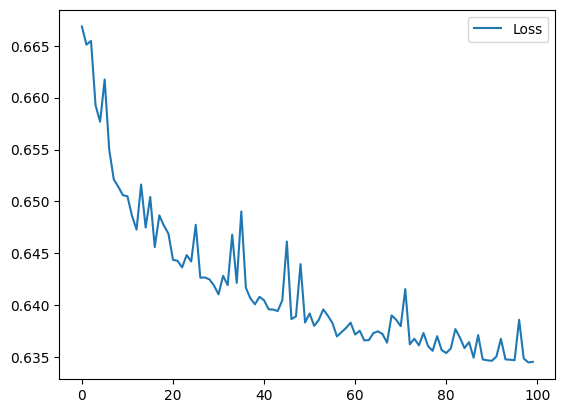

In [7]:
plt.plot(Lerror, label="Loss")
plt.legend()
plt.show()

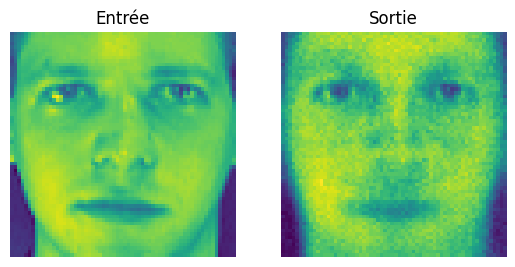

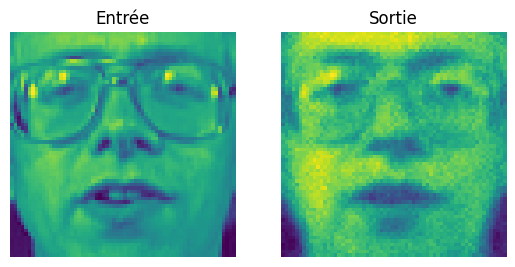

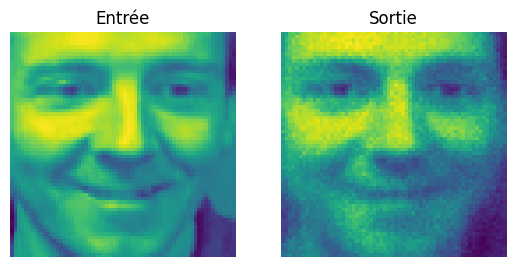

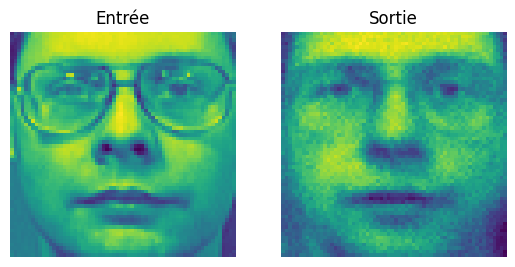

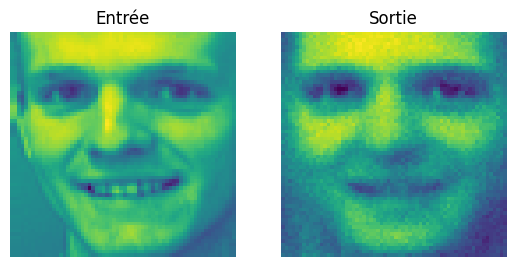

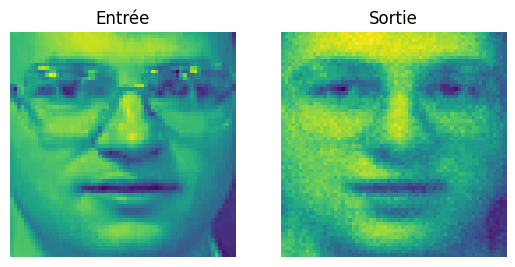

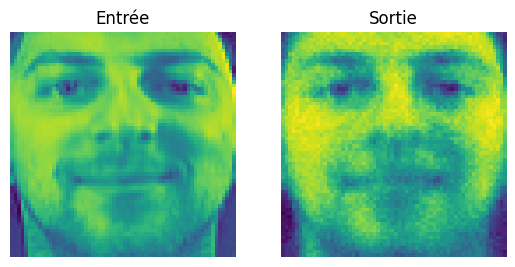

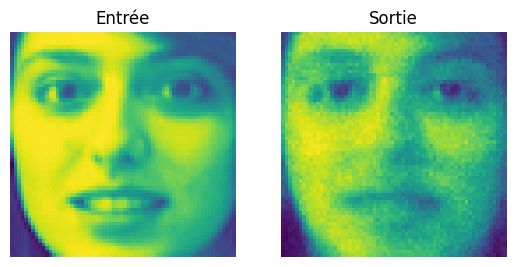

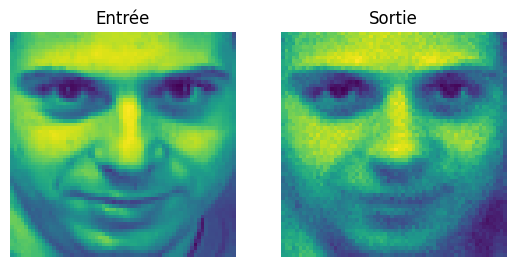

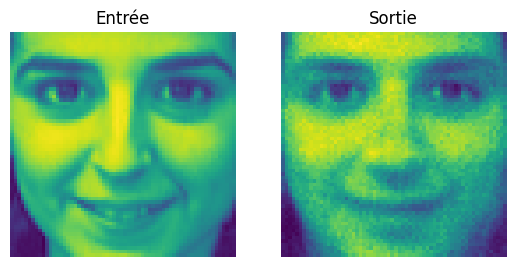

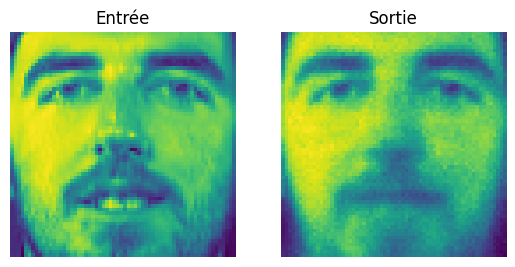

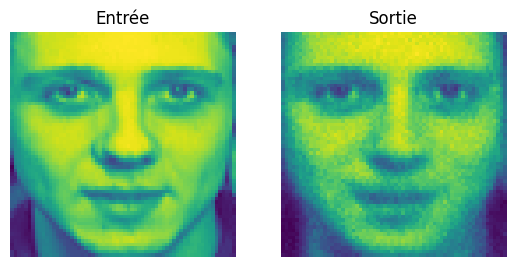

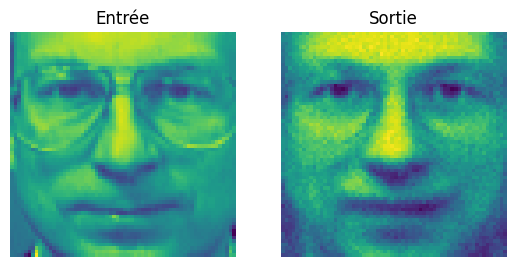

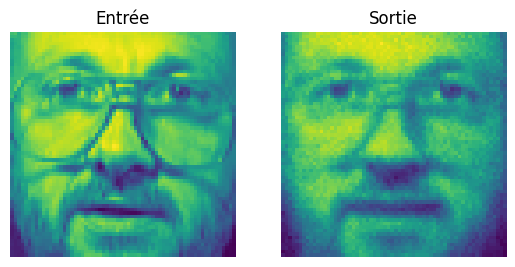

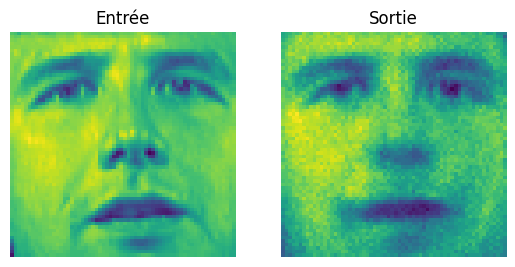

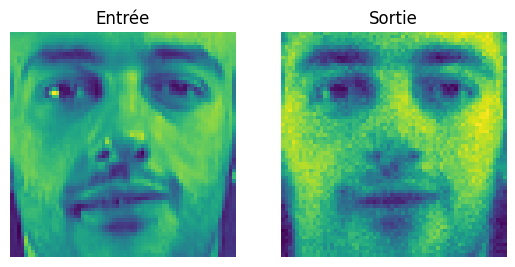

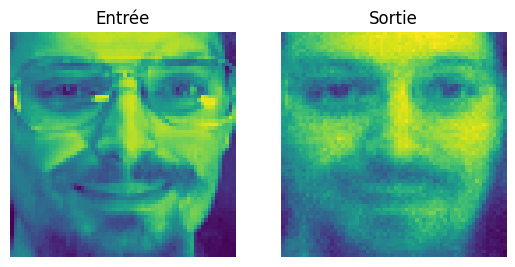

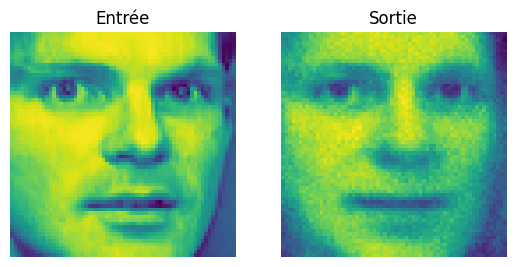

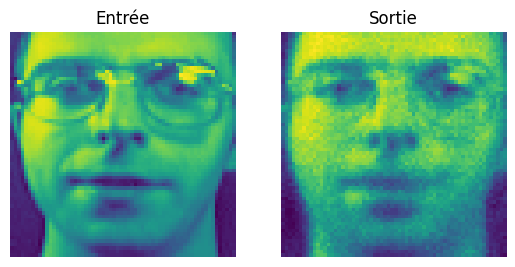

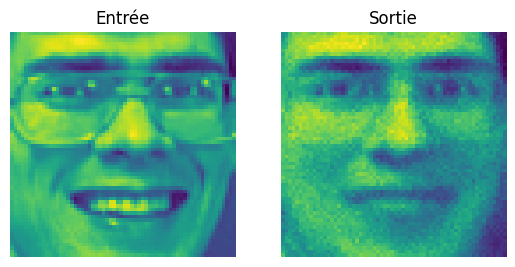

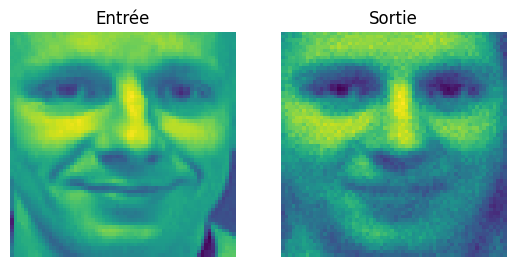

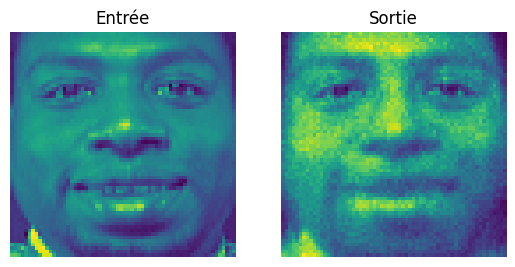

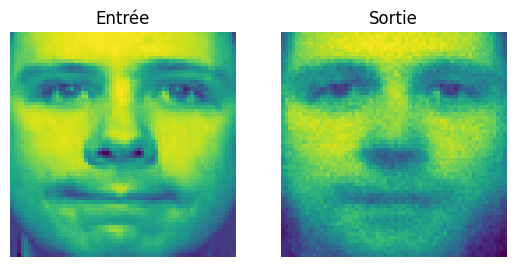

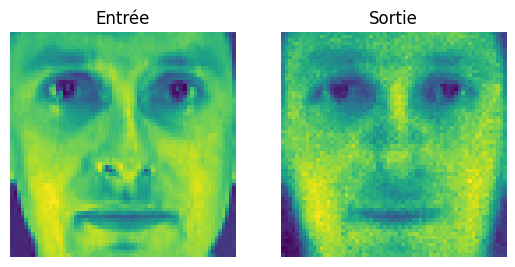

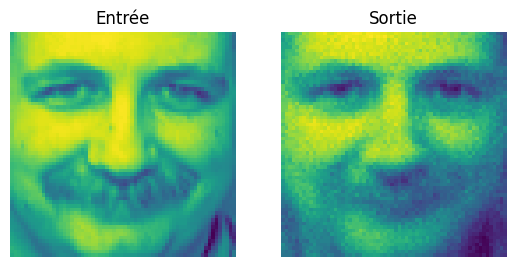

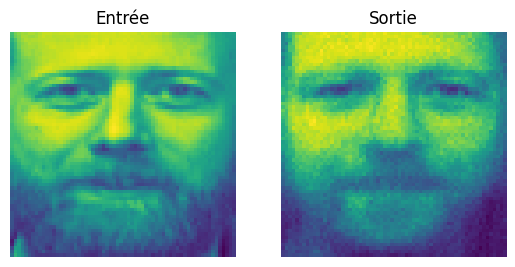

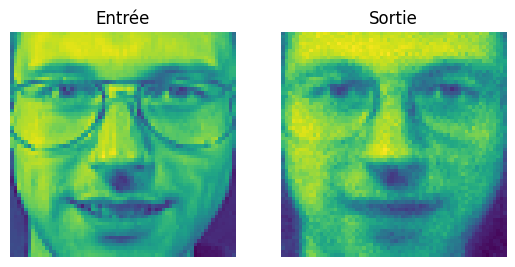

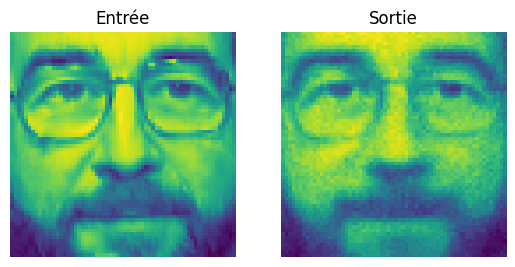

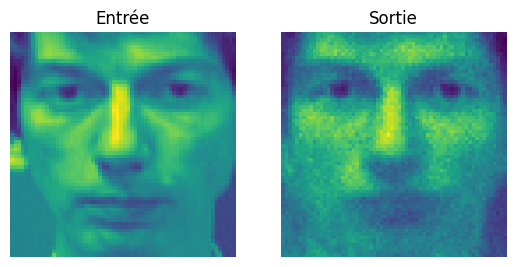

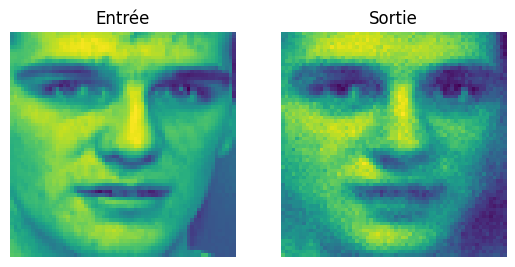

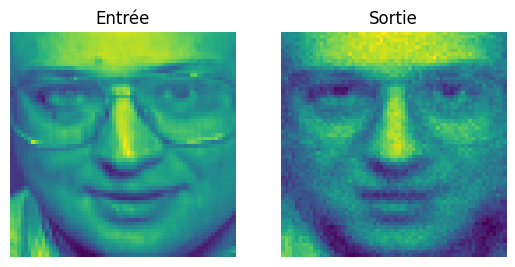

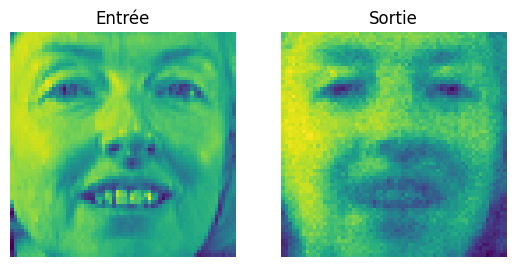

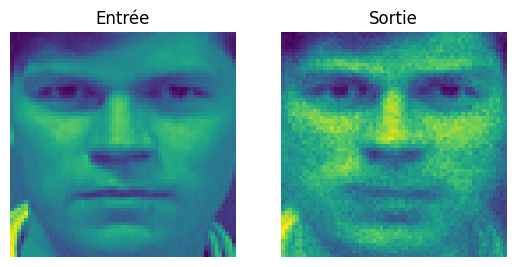

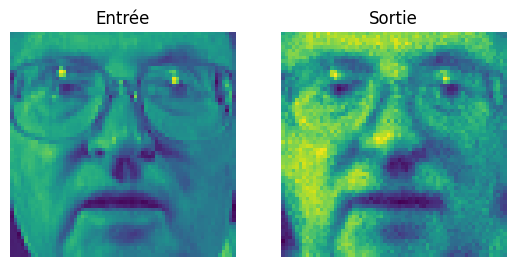

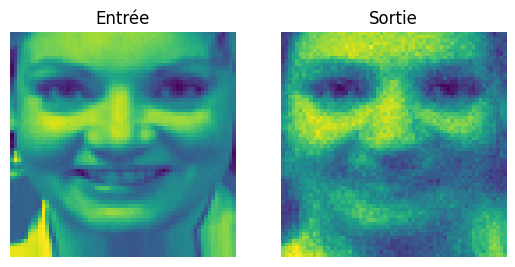

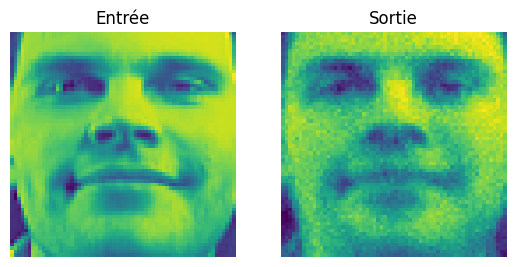

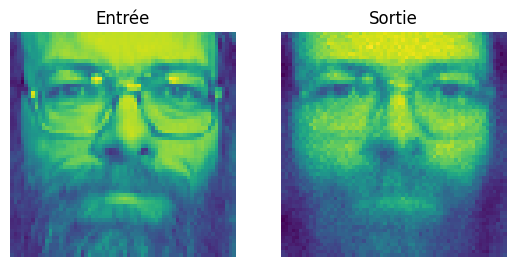

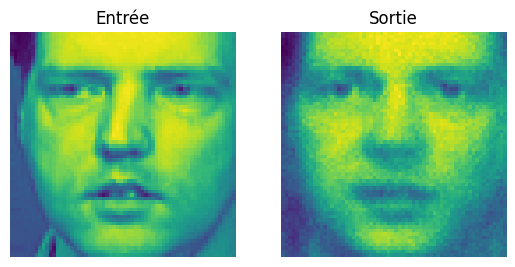

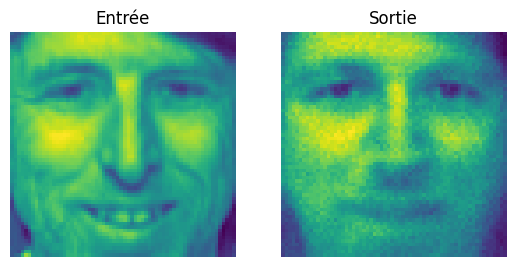

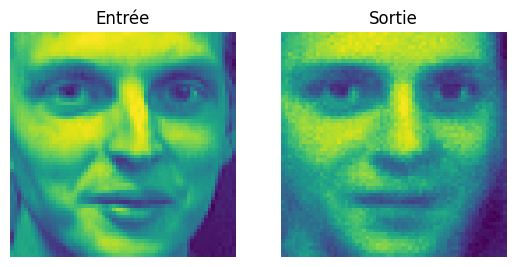

In [6]:
for i in range(40):
    plt.subplot(121)
    plt.title("Entrée")

    entree = np.array(data[label == i,:][0])
    plt.imshow(entree.reshape(64,64))
    plt.axis('off')

    plt.subplot(122)
    plt.title("Sortie")
    out = net.forward(entree.reshape(1,entree.shape[0]))
    plt.imshow(out.reshape(64,64))
    plt.axis('off')
    plt.show()

## test avec un reseau plus profond

In [12]:
Encodage = [Linear(4096, 2048), TanH() , Linear(2048, 1024), TanH(), Linear(1024, 512), TanH(), Linear(512,256),TanH()]
Decodage = [Linear(256, 512), TanH(), Linear(512, 1024),TanH() , Linear(1024, 2048), TanH(), Linear(2048, 4096), Sigmoid()]

bce_loss = BCELoss()
net = Sequential(Encodage + Decodage)

Lerror, Lscore = SGD(net, bce_loss, data, data, eps=1e-3, max_iter= 100, batch_size= 10)

Iteration: 0 / 100
cost  0.668
Iteration: 1 / 100
cost  0.668
Iteration: 2 / 100
cost  0.669
Iteration: 3 / 100
cost  0.663
Iteration: 4 / 100
cost  0.665
Iteration: 5 / 100
cost  0.662
Iteration: 6 / 100
cost  0.661
Iteration: 7 / 100
cost  0.659
Iteration: 8 / 100
cost  0.673
Iteration: 9 / 100
cost  0.658
Iteration: 10 / 100
cost  0.657
Iteration: 11 / 100
cost  0.653
Iteration: 12 / 100
cost  0.656
Iteration: 13 / 100
cost  0.654
Iteration: 14 / 100
cost  0.65
Iteration: 15 / 100
cost  0.656
Iteration: 16 / 100
cost  0.652
Iteration: 17 / 100
cost  0.651
Iteration: 18 / 100
cost  0.648
Iteration: 19 / 100
cost  0.65
Iteration: 20 / 100
cost  0.647
Iteration: 21 / 100
cost  0.648
Iteration: 22 / 100
cost  0.648
Iteration: 23 / 100
cost  0.647
Iteration: 24 / 100
cost  0.646
Iteration: 25 / 100
cost  0.647
Iteration: 26 / 100
cost  0.646
Iteration: 27 / 100
cost  0.644
Iteration: 28 / 100
cost  0.646
Iteration: 29 / 100
cost  0.648
Iteration: 30 / 100
cost  0.643
Iteration: 31 / 100


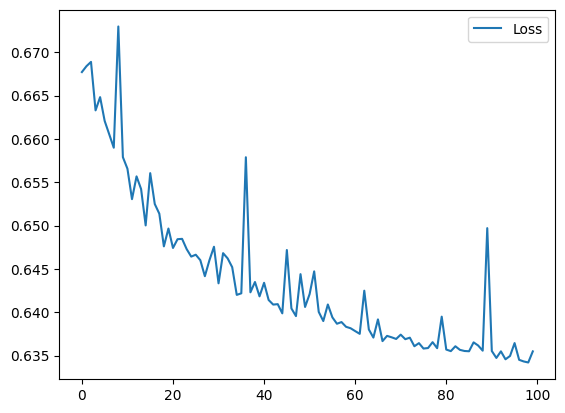

In [13]:
plt.plot(Lerror, label="Loss")
plt.legend()
plt.show()

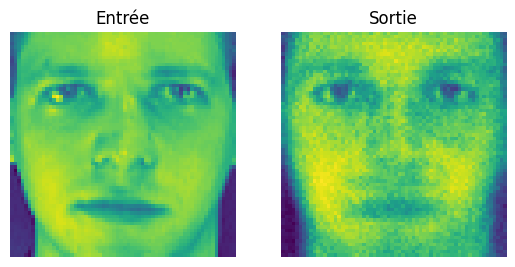

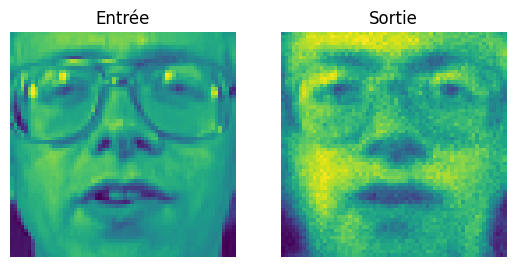

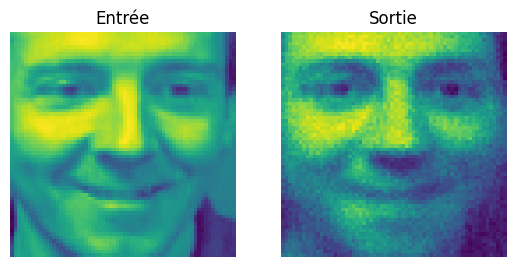

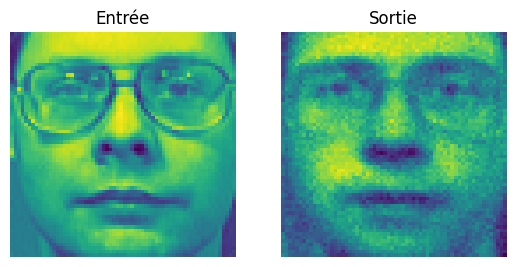

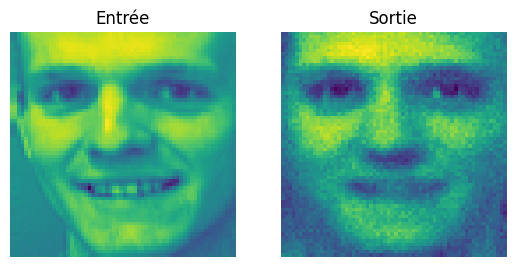

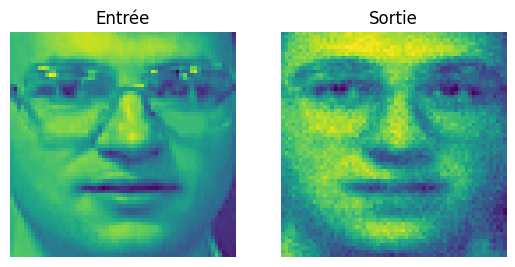

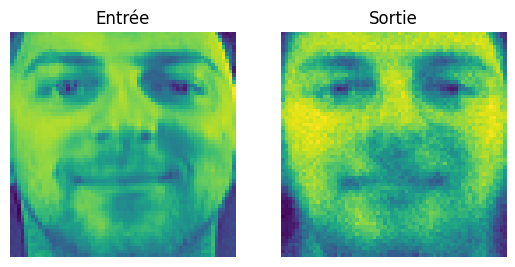

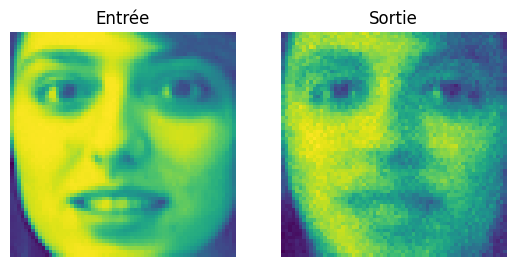

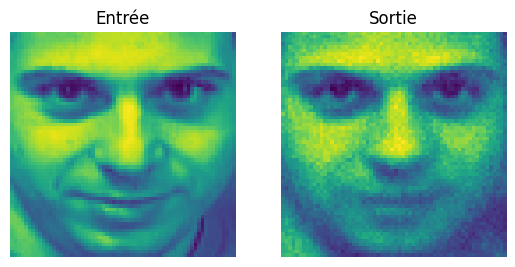

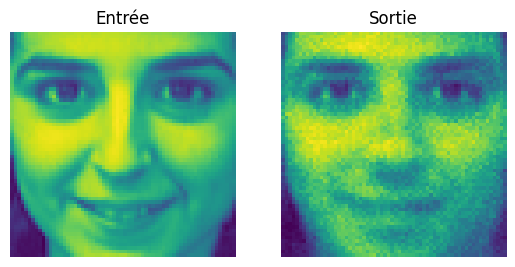

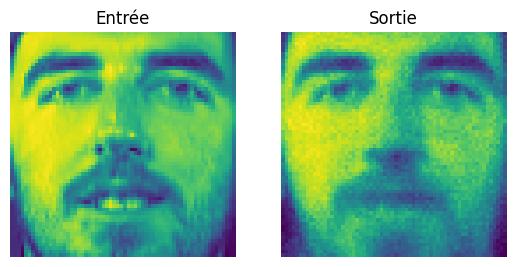

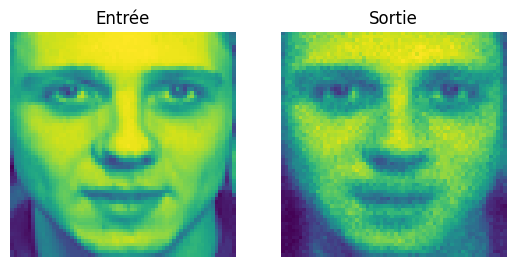

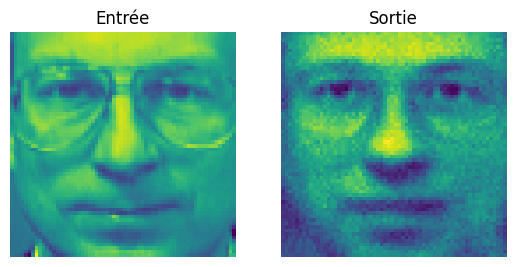

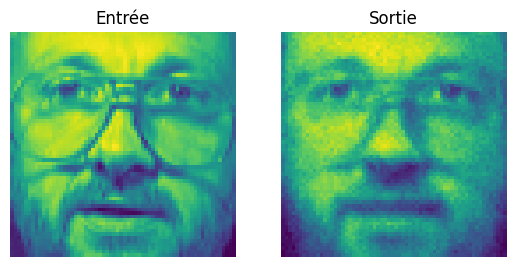

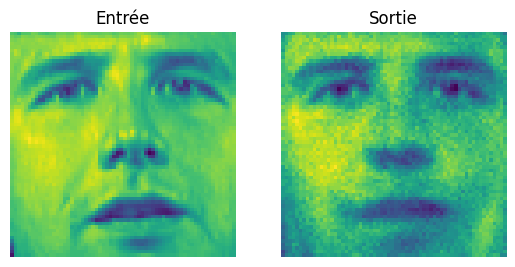

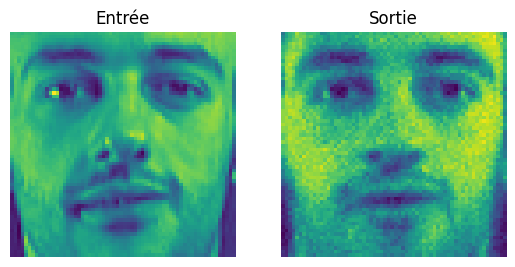

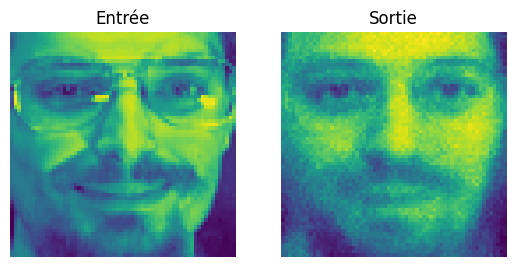

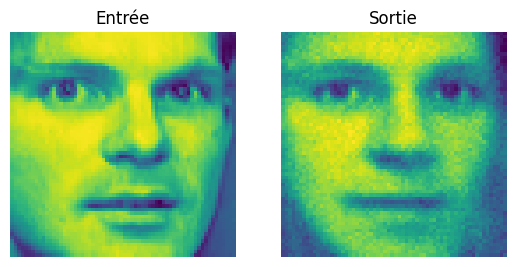

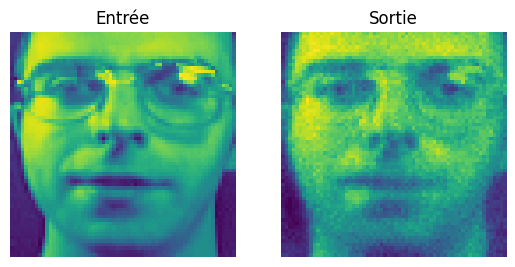

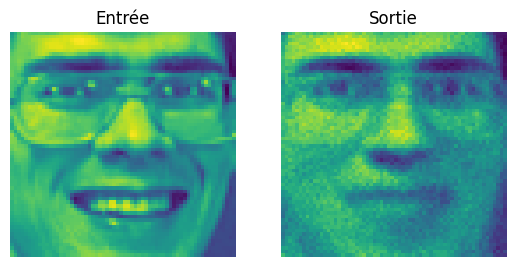

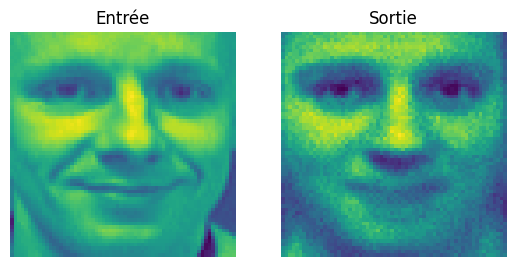

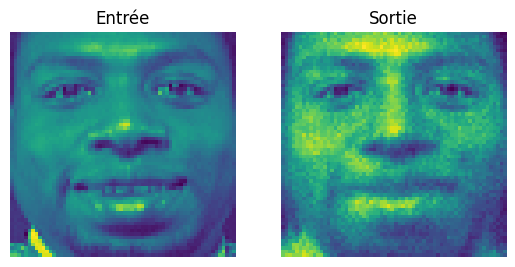

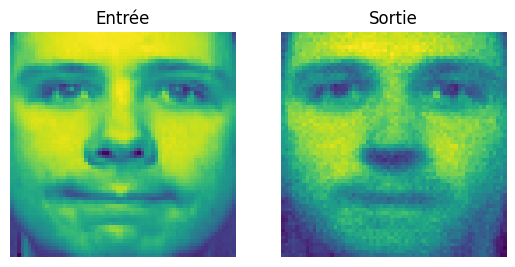

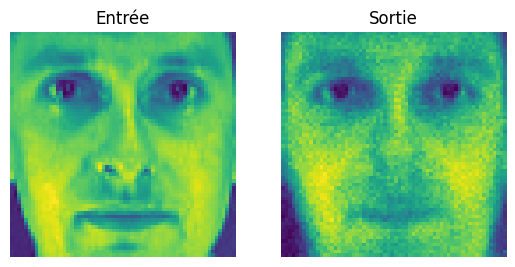

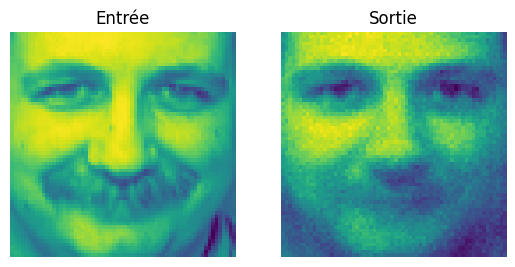

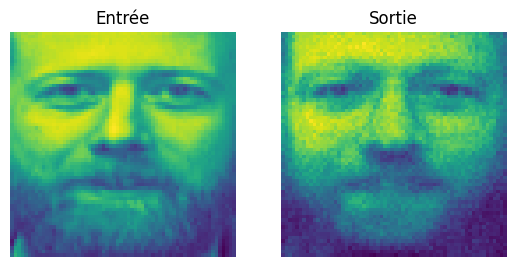

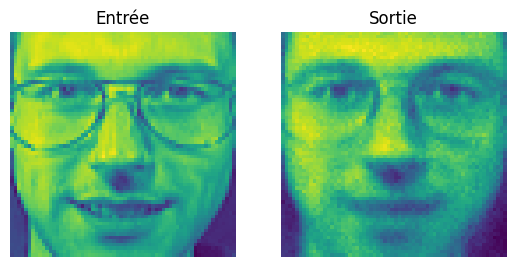

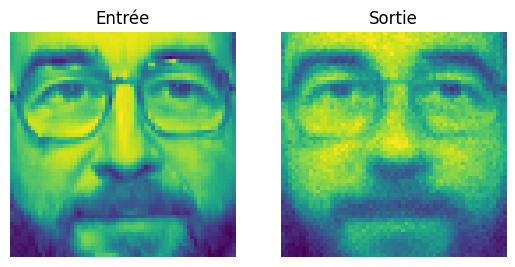

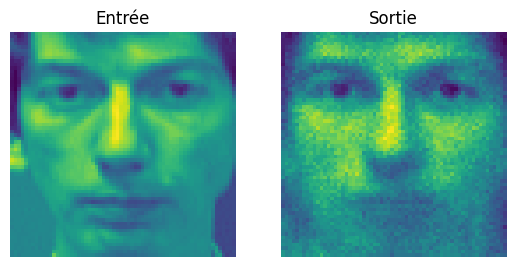

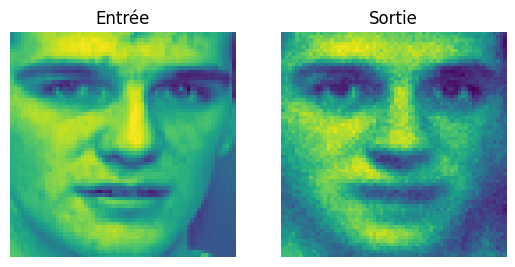

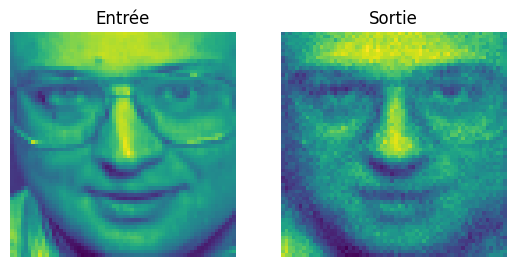

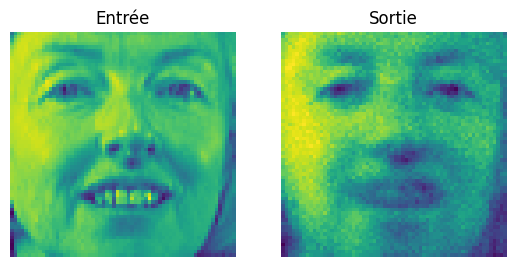

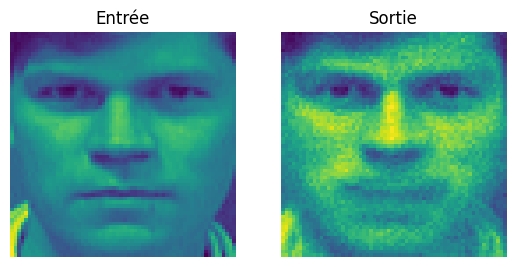

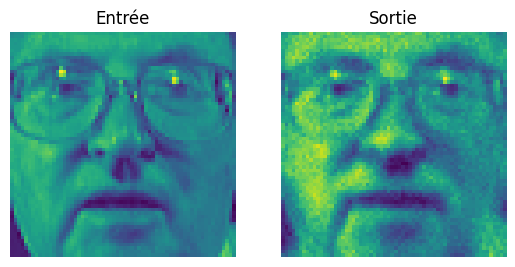

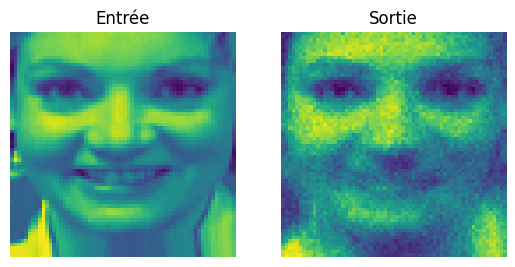

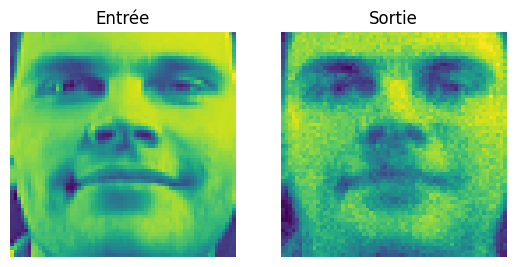

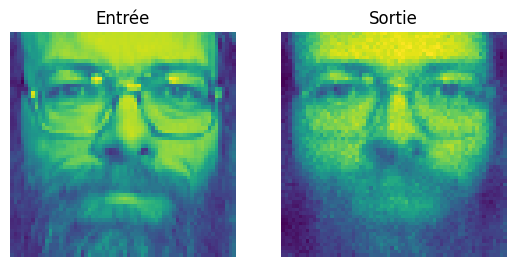

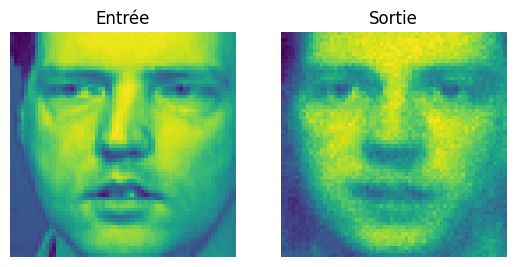

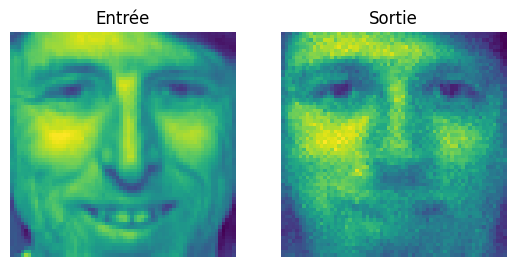

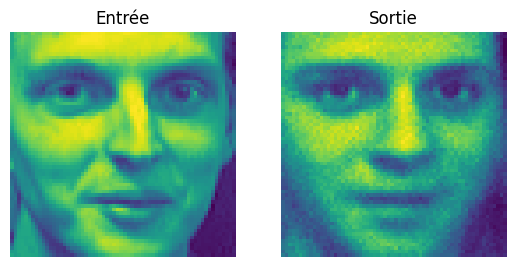

In [14]:
for i in range(40):
    plt.subplot(121)
    plt.title("Entrée")

    entree = np.array(data[label == i,:][0])
    plt.imshow(entree.reshape(64,64))
    plt.axis('off')

    plt.subplot(122)
    plt.title("Sortie")
    out = net.forward(entree.reshape(1,entree.shape[0]))
    plt.imshow(out.reshape(64,64))
    plt.axis('off')
    plt.show()

## parcours full batch

In [9]:
#Encodage = [Linear(4096, 2048), TanH() , Linear(2048, 1024), TanH(), Linear(1024, 512), TanH(), Linear(512, 256), TanH()]
#Decodage = [Linear(256 , 512), TanH() ,Linear(512, 1024) , Linear(1024, 2048), TanH(), Linear(2048, 4096), Sigmoid()]
#bce_loss = BCELoss()
#net = Sequential(Encodage + Decodage)

Encodage = [Linear(4096, 2048), TanH(), Linear(2048, 1024), TanH()]
Decodage = [Linear(1024, 2048), TanH(), Linear(2048, 4096), Sigmoid()]

bce_loss = BCELoss()
net = Sequential(Encodage + Decodage)


loss_list = []

In [ ]:
# Boucle d'entraînement en full batc
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    yhat = net.forward(data)

    # Calculer la perte
    loss = bce_loss.forward(data, yhat)
    #if epoch % 10 == 0:
    print("Epoch %d: Loss = %f" % (epoch, np.mean(loss)))

    loss_list.append(loss.mean())

    # Backward pass
    # print(tan.shape)
    # print(delta.shape)
    # print(linear2._gradient.shape)
    delta = bce_loss.backward(data, yhat)
    delta = net.backward(data, delta, gradient_step = 0.001)

Epoch 0: Loss = 0.663064
Epoch 1: Loss = 0.663292
Epoch 2: Loss = 0.662618
Epoch 3: Loss = 0.663084
Epoch 4: Loss = 0.662423
Epoch 5: Loss = 0.663312
Epoch 6: Loss = 0.662306
Epoch 7: Loss = 0.663510
Epoch 8: Loss = 0.662199
Epoch 9: Loss = 0.663733
Epoch 10: Loss = 0.662340
Epoch 11: Loss = 0.664248
Epoch 12: Loss = 0.662216
Epoch 13: Loss = 0.663479
Epoch 14: Loss = 0.662188
Epoch 15: Loss = 0.663115
Epoch 16: Loss = 0.661866
Epoch 17: Loss = 0.662279
Epoch 18: Loss = 0.661722
Epoch 19: Loss = 0.662008
Epoch 20: Loss = 0.662014
Epoch 21: Loss = 0.662170
Epoch 22: Loss = 0.663225
Epoch 23: Loss = 0.662246
Epoch 24: Loss = 0.663855
Epoch 25: Loss = 0.661476
Epoch 26: Loss = 0.662487
Epoch 27: Loss = 0.660945
Epoch 28: Loss = 0.662120
Epoch 29: Loss = 0.660582
Epoch 30: Loss = 0.662262
Epoch 31: Loss = 0.660656
Epoch 32: Loss = 0.663777
Epoch 33: Loss = 0.660357
Epoch 34: Loss = 0.663054
Epoch 35: Loss = 0.660936
Epoch 36: Loss = 0.663629
Epoch 37: Loss = 0.659813
Epoch 38: Loss = 0.660

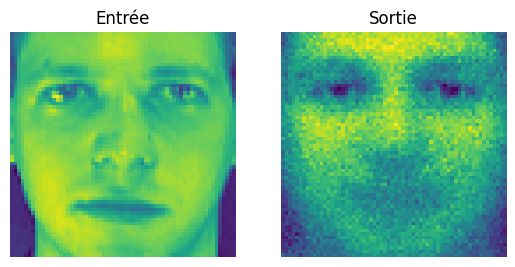

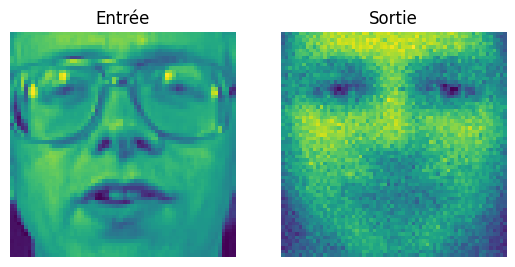

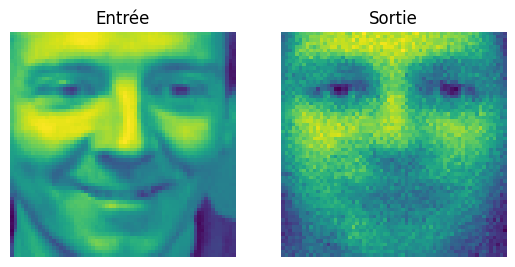

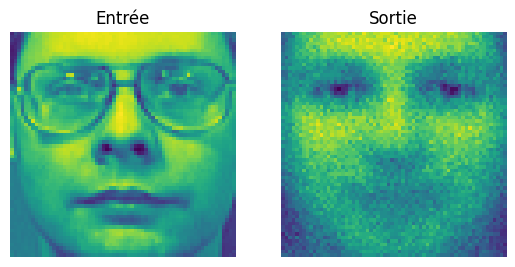

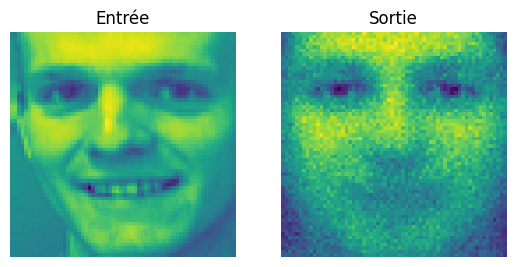

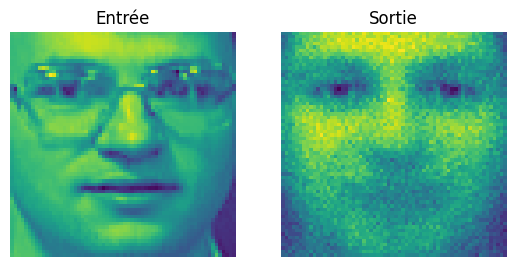

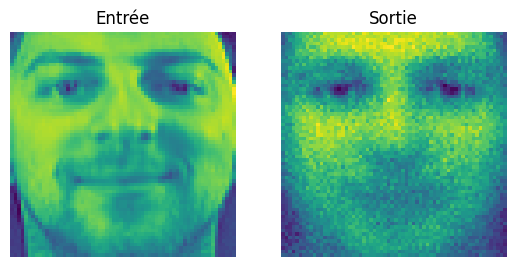

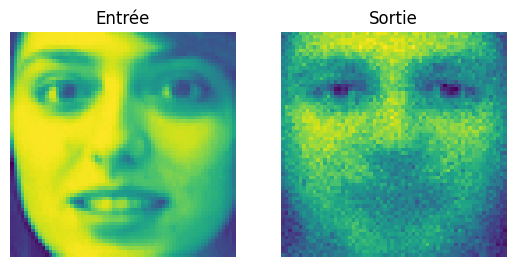

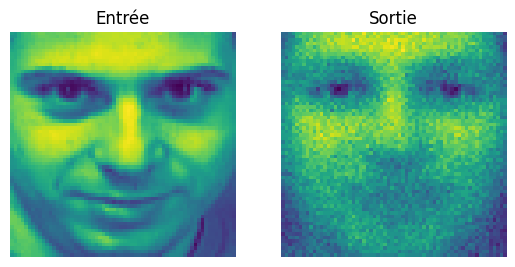

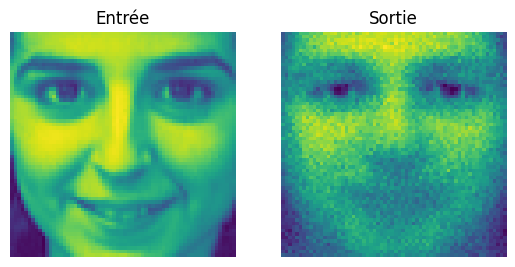

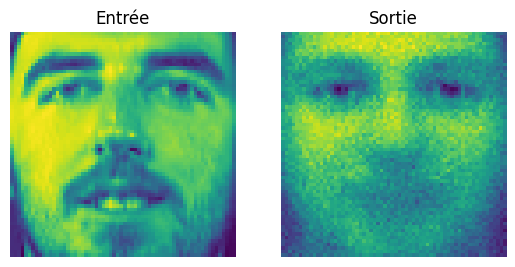

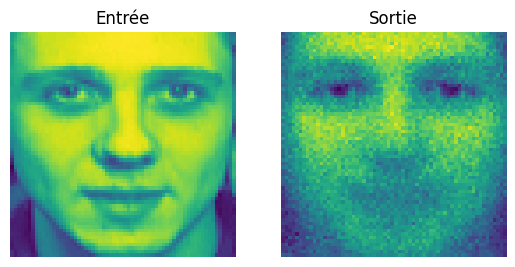

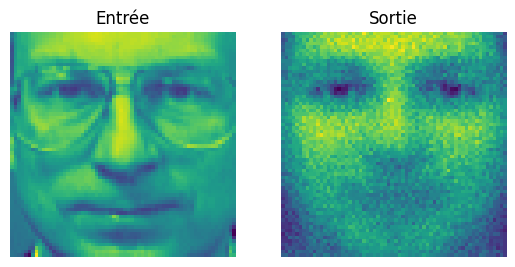

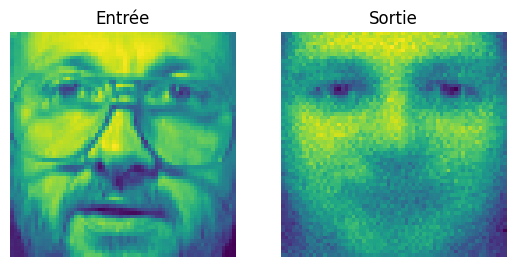

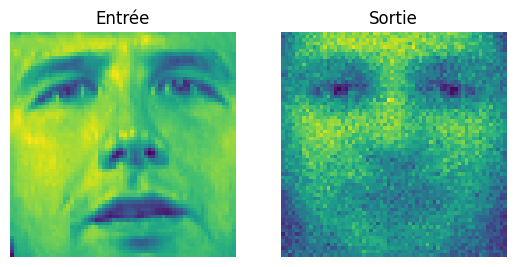

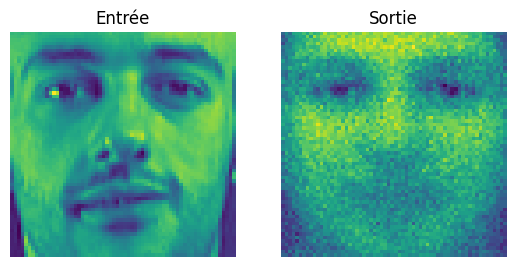

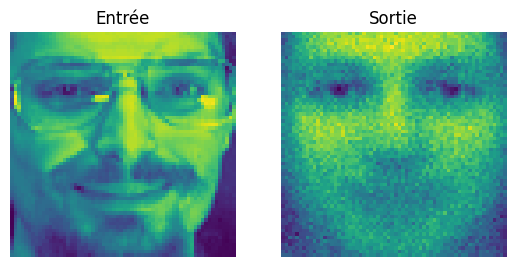

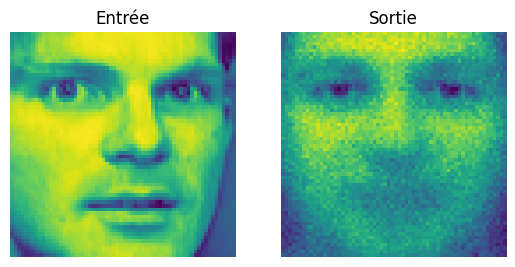

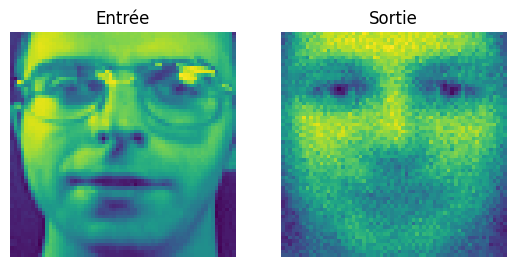

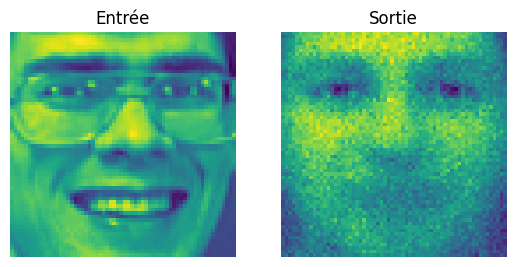

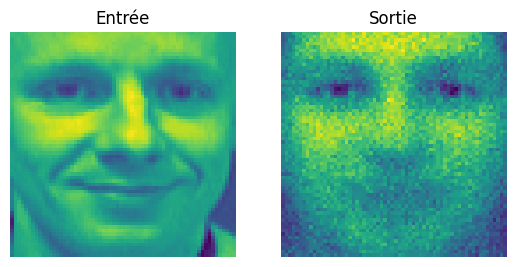

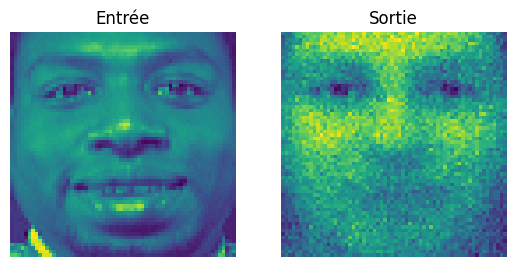

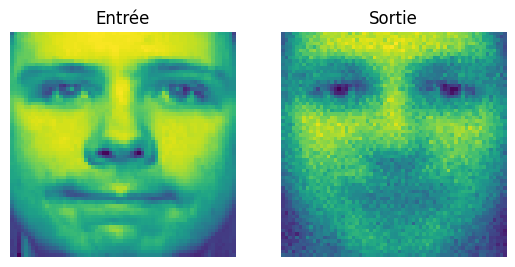

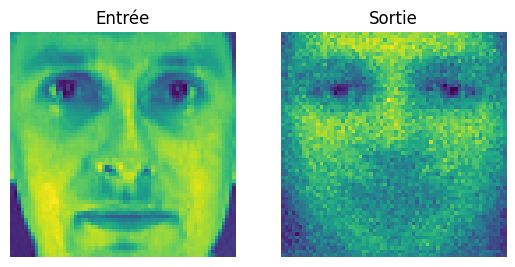

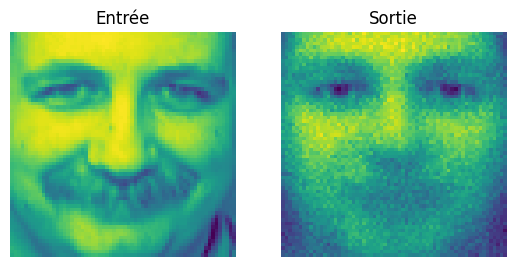

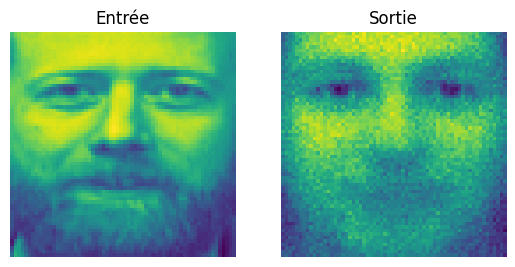

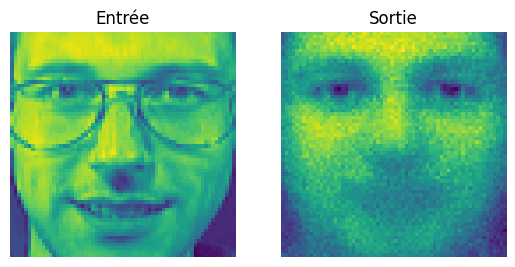

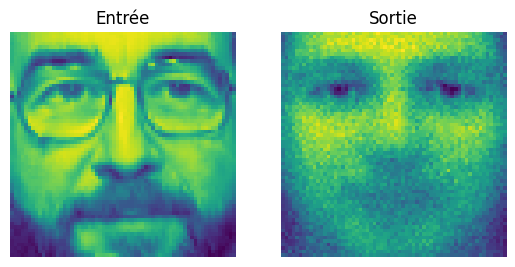

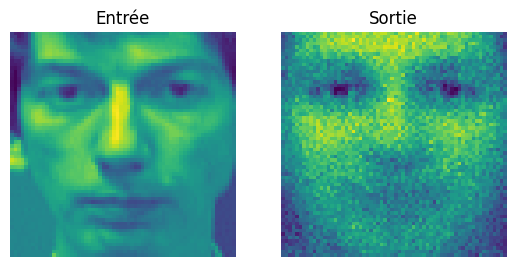

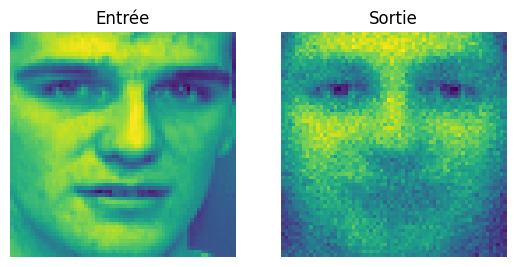

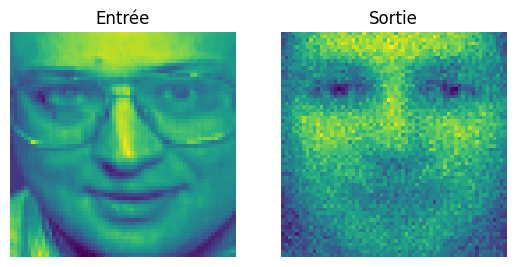

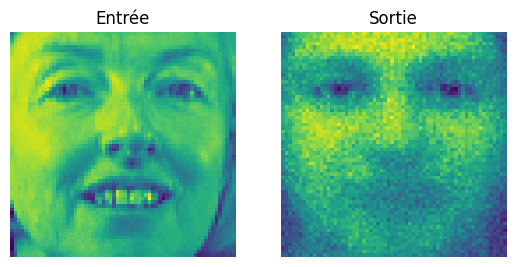

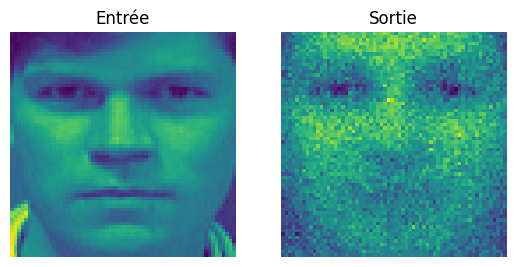

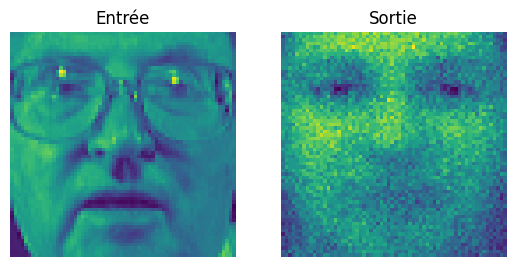

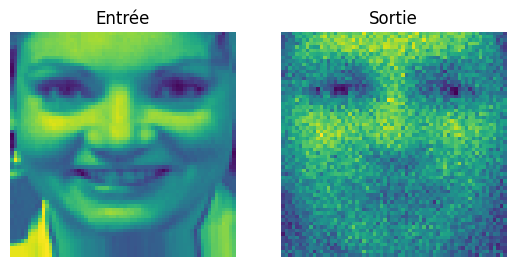

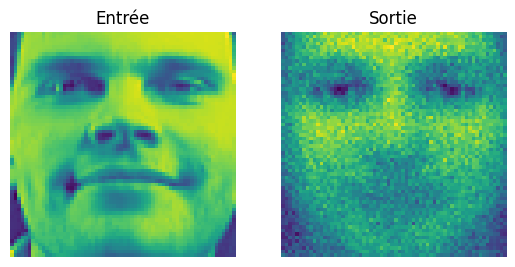

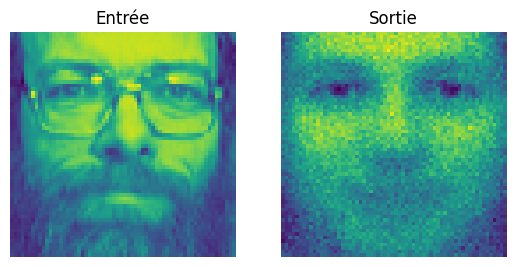

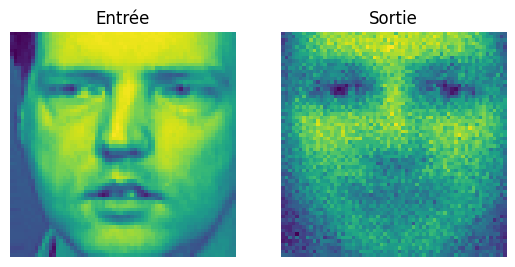

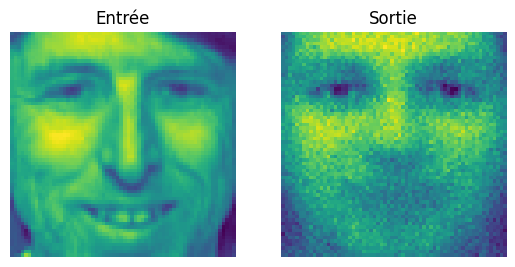

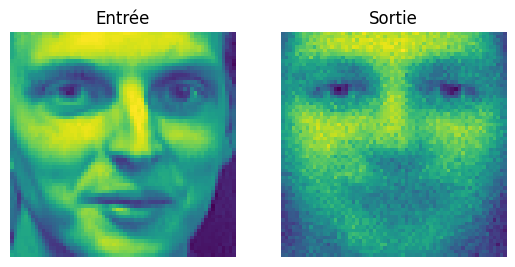

In [11]:
for i in range(40):
    plt.subplot(121)
    plt.title("Entrée")

    entree = np.array(data[label == i,:][0])
    plt.imshow(entree.reshape(64,64))
    plt.axis('off')

    plt.subplot(122)
    plt.title("Sortie")
    out = net.forward(entree.reshape(1,entree.shape[0]))
    plt.imshow(out.reshape(64,64))
    plt.axis('off')
    plt.show()